# Preliminary #

In [1]:
### Importing Libraries ###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

np.set_printoptions(precision=2,suppress=True)
np.warnings.filterwarnings('ignore')

In [2]:
### Some Functions ###

# Function that return a two bit(y1,y2) number given inputs(a1,a2,b1,b2,c) aaccording to specifications.
def get_y(a1,a2,b1,b2,c):
    y1 = a1^b1
    y2 = a2^b2

    if(c):return 1-y1,1-y2
    else :return y1,y2
    
# Returns derivative of Relu for use in backpropgation
def relu_derivative(Zn):
    return np.greater(Zn,np.zeros(Zn.shape)) * np.ones(Zn.shape)

# Creating Custom Training Set #

The custom dataset is imported from x1.csv and contains 32 data points covering each permutation of the five input data features exactly once.

In [3]:
### Reading in X_train ###

X_in = pd.read_csv("x1.csv")
X_train = X_in.T
 
n,m = X_train.shape;
train_size = m

print("No of training examples, m : " + str(m))
print("No of input features, n : " + str(n))

X_train.head()

No of training examples, m : 32
No of input features, n : 5


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
A1,0,0,0,0,0,0,0,0,1,1,...,0,0,1,1,1,1,1,1,1,1
A2,0,0,0,0,1,1,1,1,0,0,...,1,1,0,0,0,0,1,1,1,1
B1,0,0,1,1,0,0,1,1,0,0,...,1,1,0,0,1,1,0,0,1,1
B2,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
C,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [4]:
### Creating Y_train. ###

Y_train = np.full((32,2),-1)

for i in range(m):
    a = X_train.iloc[:,i]
    Y_train[i,0],Y_train[i,1] = get_y(a[0],a[1],a[2],a[3],a[4])
    
Y_train = pd.DataFrame(Y_train,columns=["Y1","Y2"])
Y_train = Y_train.T
Y_train.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Y1,0,0,1,1,0,0,1,1,1,1,...,0,0,0,0,1,1,0,0,1,1
Y2,0,1,0,1,1,0,1,0,0,1,...,0,1,1,0,1,0,0,1,0,1


# Creating Random Training Set #

The Random dataset contains `train_size` data points (default 1000) that are uniformly sampled. Each point corresponds to one of 32 possible input combinations.

In [5]:
train_size = 1000

In [6]:
### Creating X_train ###

X_train = np.random.randint(0,2,(train_size,5))
X_train = pd.DataFrame(X_train,columns=("A1","A2","B1","B2","C"))
X_train = X_train.T
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
A1,1,1,1,1,0,1,1,0,0,0,...,0,0,1,0,0,0,1,1,1,1
A2,1,1,1,1,1,1,1,1,0,0,...,0,0,0,1,1,1,1,0,1,1
B1,0,1,1,0,1,0,1,0,1,1,...,1,0,1,0,0,1,0,1,1,1
B2,0,0,1,1,1,0,1,1,1,0,...,0,0,1,1,0,0,0,0,0,1
C,0,1,0,0,1,0,0,0,1,1,...,1,1,1,0,1,1,1,1,1,1


In [7]:
### Creating Y_train ###

Y_train = np.full((train_size,2),-1)

for i in range(train_size):
    a = X_train.iloc[:,i]
    Y_train[i,0],Y_train[i,1] = get_y(a[0],a[1],a[2],a[3],a[4])
    
Y_train = pd.DataFrame(Y_train,columns=["Y1","Y2"])
Y_train = Y_train.T
Y_train.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Y1,1,1,0,1,0,1,0,0,0,0,...,0,1,1,0,1,0,0,1,1,1
Y2,1,0,0,0,1,1,0,0,0,1,...,1,1,0,0,0,0,0,1,0,1


# Creating Cross-Validation Set #

In [8]:
cv_size = 100

In [9]:
### Creating X_cv ###

X_cv = np.random.randint(0,2,(cv_size,5))
X_cv = pd.DataFrame(X_cv,columns=("A1","A2","B1","B2","C"))
X_cv = X_cv.T
X_cv.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
A1,1,1,1,1,1,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,1
A2,0,1,1,0,1,0,1,0,0,0,...,0,0,1,0,1,1,0,0,1,0
B1,1,1,1,0,1,1,0,0,1,1,...,0,1,1,0,1,0,0,0,0,1
B2,0,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,1,0,0
C,0,1,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,1,1,1,0


In [10]:
### Creating Y_cv ###

Y_cv = np.full((cv_size,2),-1)

for i in range(cv_size):
    a = X_cv.iloc[:,i]
    Y_cv[i,0],Y_cv[i,1] = get_y(a[0],a[1],a[2],a[3],a[4])
    
Y_cv = pd.DataFrame(Y_cv,columns=["Y1","Y2"])
Y_cv= Y_cv.T
Y_cv.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Y1,0,1,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
Y2,0,0,1,0,0,0,0,1,0,0,...,0,1,1,1,1,1,0,0,0,0


In [11]:
### Converting to numpy-ndarray ###

X_train = X_train.values
Y_train = Y_train.values

X_cv = X_cv.values
Y_cv = Y_cv.values

# Neural Network Architecture : #
* 2 Layer model with a hidden layer containing 6 nodes.
* Input Layer(5 nodes) ---> Hidden Layer 1(6 nodes) ---> Output Layer(2 nodes)
* Activation for Layer 1 : Relu.
* Activation for Layer 2 : Sigmoid.

In [36]:
### Defining the Architecture ###

n,m = X_train.shape
hidden_layer_nodes = 6

assert(X_train.shape[1] == Y_train.shape[1])
assert(X_cv.shape[1] == Y_cv.shape[1])

n0 = X_train.shape[0]      # Nodes in Input Layer
n1 = hidden_layer_nodes    # Nodes in Hidden Layer
n2 = Y_train.shape[0]      # Nodes in Output Layer

In [37]:
### Initializing the Parameters ###

W1 = np.random.randn(n1,n0) * np.sqrt(2/n0)
b1 = np.random.randn(n1,1) * np.sqrt(2/n0)

W2 = np.random.randn(n2,n1) * np.sqrt(2/n1)
b2 = np.random.randn(n2,1) * np.sqrt(2/n1)

print("Shape of W1 : " + str(W1.shape))
print("Shape of b1 : " + str(b1.shape))
print("Shape of W2 : " + str(W2.shape))
print("Shape of b2 : " + str(b2.shape))

Shape of W1 : (6, 5)
Shape of b1 : (6, 1)
Shape of W2 : (2, 6)
Shape of b2 : (2, 1)


In [38]:
### Setting up Monitering Tools ###

train_cost_vals = []
cv_cost_vals = []
train_acc_vals = []
cv_acc_vals = []
iter_vals = []

iteration = 0

In [44]:
### Initializing the Hyper-parameters ###

learning_rate = 0.1             # Learning Rate = 0.1
num_iterations = 200000          # No of iterations = 1,000,000

# Training the Model #

In [45]:
### Implementing the Neural Net ###

print("Beginning Training...")
print("----------------------------------------------------------------------------------------")

for i in range(num_iterations):
    iteration += 1
    
    train_crrct = 0
    train_total = 0
    cv_crrct = 0
    cv_total = 0 
    
    ### Forward Pass
    
    # Hidden Layer 1 
    Z1 = np.matmul(W1,X_train) + b1
    A1 = np.maximum(Z1,0)
    
    # Output Layer
    Z2 = np.matmul(W2,A1) + b2
    A2 = 1/(1 + np.exp(-1 * Z2))
        
    ### Cost Calulation
    cost = (-1/m) * np.sum(np.multiply(Y_train, np.log(A2)) + np.multiply(1-Y_train, np.log(1-A2)))
    cost = np.squeeze(cost)
    train_cost = cost
    
    ### Backward Pass
    
    # Output Layer
    dZ2 = A2 - Y_train
    dW2 = (1/m) * np.matmul(dZ2,A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    
    # Hidden Layer 1
    dZ1 = np.matmul(W2.T,dZ2) * relu_derivative(Z1)
    dW1 = (1/m) * np.matmul(dZ1,X_train.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    ### Updating parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    ### Getting Train Accuracy
    train_crrct += (abs(Y_train - A2) <.01).sum()
    train_total += Y_train.size
    train_acc = (100.0 * train_crrct)/train_total
    
    ### Getting Cross Validation Cost and Accuracy
    Z1 = np.matmul(W1,X_cv) + b1
    A1 = np.maximum(Z1,0)
    Z2 = np.matmul(W2,A1) + b2
    A2 = 1/(1 + np.exp(-1 * Z2))
    
    cv_cost = (-1/cv_size) * np.sum(np.multiply(Y_cv, np.log(A2)) + np.multiply(1-Y_cv, np.log(1-A2)))
    cv_cost = np.squeeze(cv_cost)

    cv_crrct += (abs(Y_cv - A2) <.01).sum()
    cv_total += Y_cv.size
    cv_acc = (100.0 * cv_crrct)/cv_total
    
    if(iteration%10==0):
        iter_vals.append(iteration)
        train_cost_vals.append(train_cost)
        cv_cost_vals.append(cv_cost)  
        train_acc_vals.append(train_acc)
        cv_acc_vals.append(cv_acc)
        
        if(iteration%10000==0):
            print("Iteration : " + str(iteration))
            print()
            print("- Train cost       : {:.5f}".format(train_cost))
            print("- Cross Val. cost  : {:.5f}".format(cv_cost))
            print("- Train acc        : {:.5f}".format(train_acc))
            print("- Cross Val. acc   : {:.5f}".format(cv_acc))
            print("----------------------------------------------------------------------------------------")

print("Done")

Beginning Training...
----------------------------------------------------------------------------------------
Iteration : 110000

- Train cost       : 0.77846
- Cross Val. cost  : 0.83314
- Train acc        : 23.35000
- Cross Val. acc   : 22.50000
----------------------------------------------------------------------------------------
Iteration : 120000

- Train cost       : 0.76239
- Cross Val. cost  : 0.82353
- Train acc        : 17.00000
- Cross Val. acc   : 16.50000
----------------------------------------------------------------------------------------
Iteration : 130000

- Train cost       : 0.74919
- Cross Val. cost  : 0.79711
- Train acc        : 24.70000
- Cross Val. acc   : 20.00000
----------------------------------------------------------------------------------------
Iteration : 140000

- Train cost       : 0.73664
- Cross Val. cost  : 0.79718
- Train acc        : 40.70000
- Cross Val. acc   : 38.50000
----------------------------------------------------------------------

# Results #

SUMMARY : 
Architecture        : 5 - 6 - 2
Activations         : Relu, Sigmoid
Iterations          : 300000
Learning Rate       : 0.1
Train Dataset       : Random
Train Size          : 1000
Cross Val. Size     : 100
Train Accuracy      : 100.00000
Cross Val. Accuracy : 100.00000
Train Cost          : 0.00018
Cross Val. Cost     : 0.00018


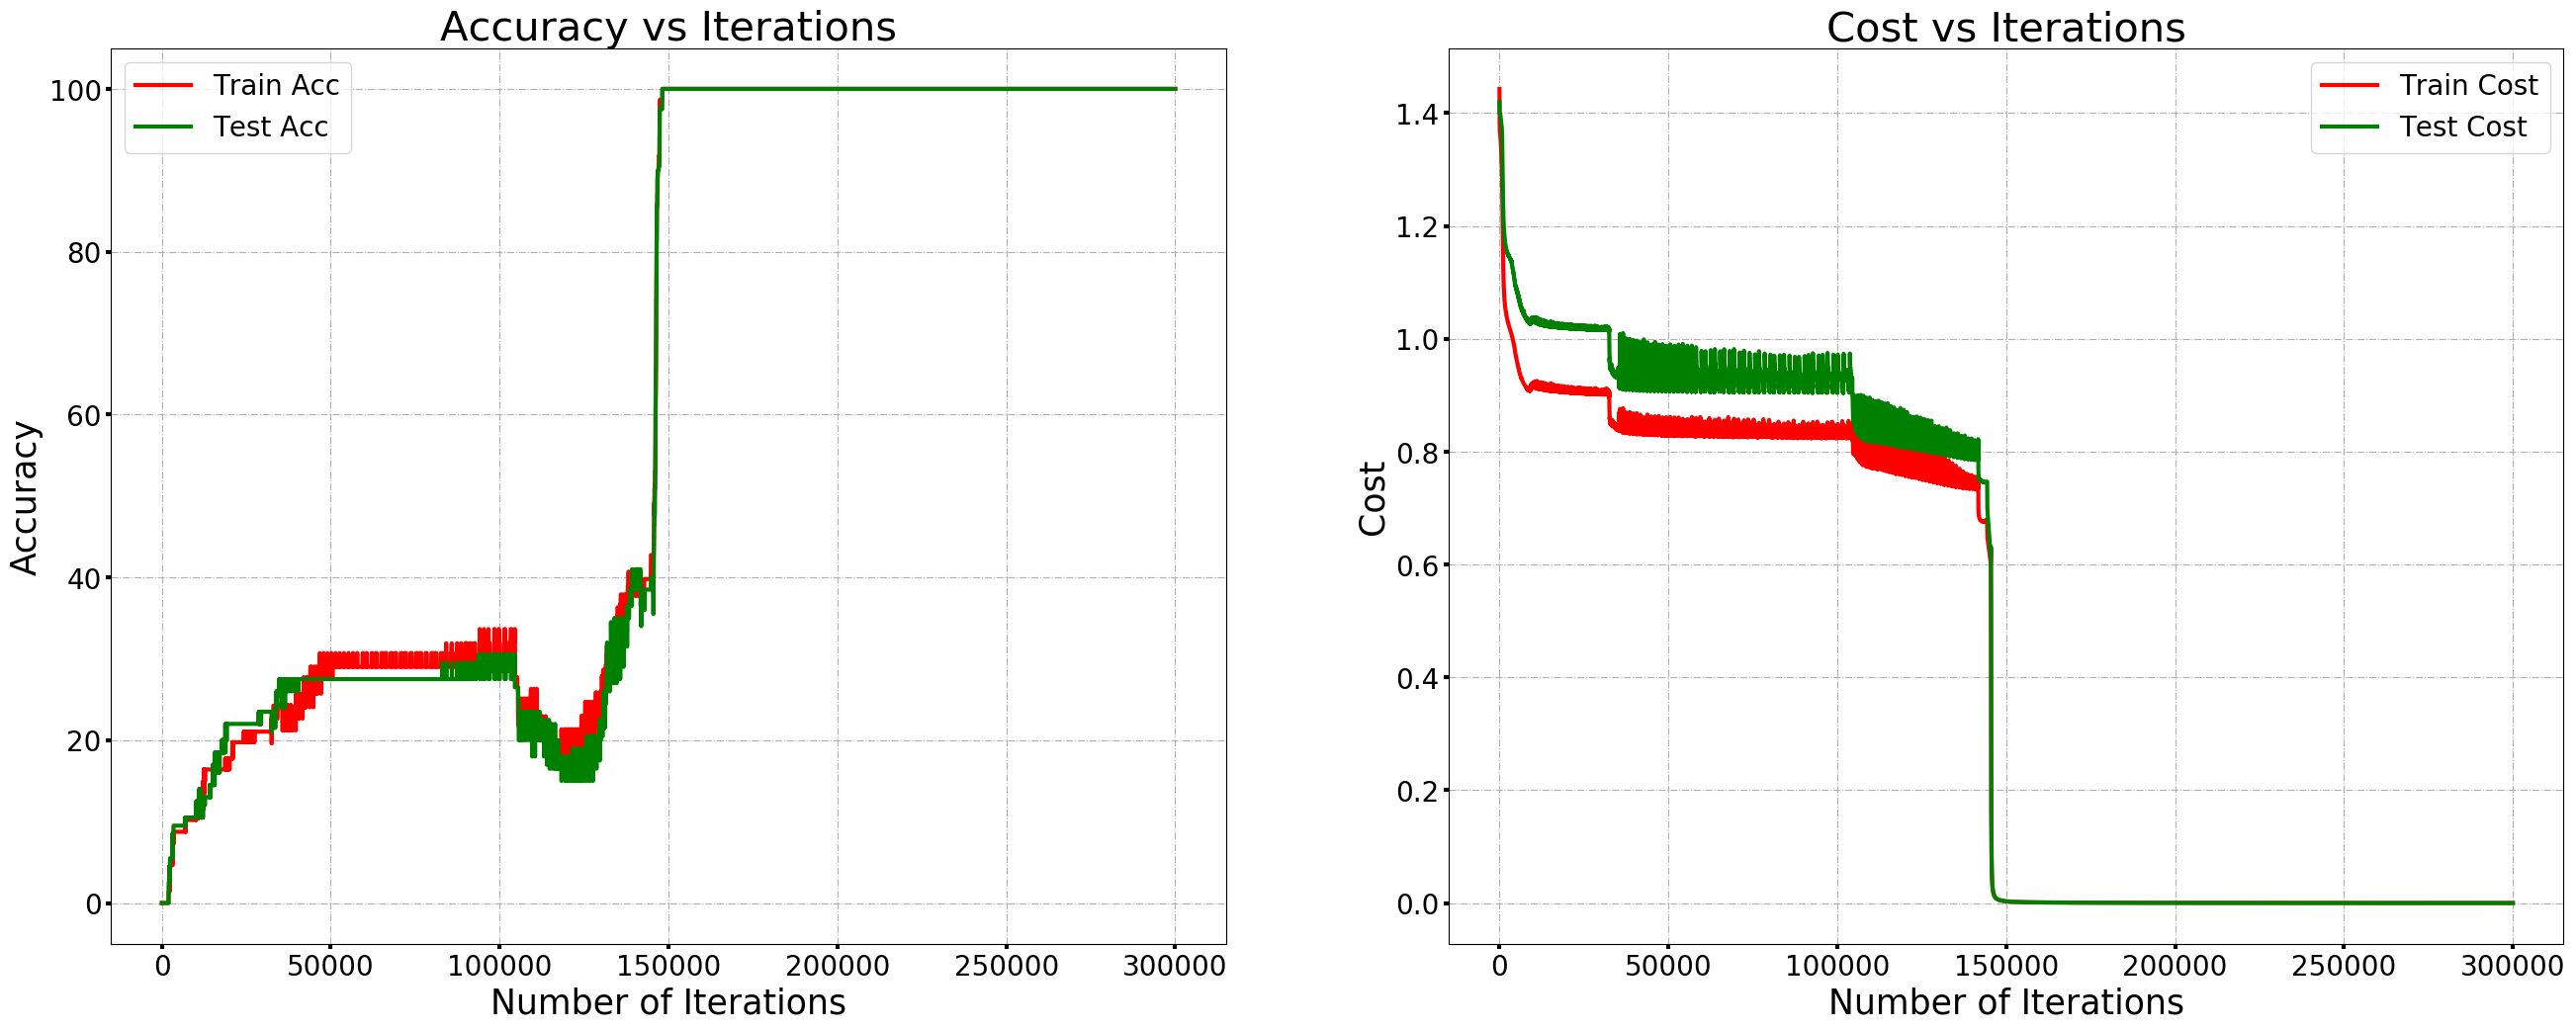

In [46]:
### Summary of Results ###

print("SUMMARY : ")
print("Architecture        : 5 - 6 - 2")
print("Activations         : Relu, Sigmoid")
print("Iterations          : " + str(iteration))
print("Learning Rate       : " + str(learning_rate))
print("Train Dataset       : Random")
print("Train Size          : " + str(train_size))
print("Cross Val. Size     : " + str(cv_size))
print("Train Accuracy      : {:.5f}".format(train_acc_vals[-1]))
print("Cross Val. Accuracy : {:.5f}".format(cv_acc_vals[-1]))
print("Train Cost          : {:.5f}".format(train_cost_vals[-1]))
print("Cross Val. Cost     : {:.5f}".format(cv_cost_vals[-1]))
#test_model()

plt.figure(figsize=[32,12], dpi=100)

plt.subplot(1, 2, 1)
plt.plot(iter_vals, train_acc_vals, '-', lw=3, c='red', label='Train Acc')
plt.plot(iter_vals, cv_acc_vals, '-', lw=3, c='green', label='Test Acc')
plt.legend(fontsize='20')
plt.title('Accuracy vs Iterations', size='30')
plt.xlabel('Number of Iterations', size='25')
plt.ylabel('Accuracy', size='25')
plt.grid(True, linestyle='-.',)
plt.tick_params(labelcolor='k', labelsize='20', width=3)

plt.subplot(1, 2, 2)
plt.plot(iter_vals, train_cost_vals, '-', lw=3, c='red', label='Train Cost')
plt.plot(iter_vals, cv_cost_vals, '-', lw=3, c='green', label='Test Cost')
plt.legend(fontsize='20')
plt.title('Cost vs Iterations', size='30')
plt.xlabel('Number of Iterations', size='25')
plt.ylabel('Cost', size='25')
plt.grid(True, linestyle='-.',)
plt.tick_params(labelcolor='k', labelsize='20', width=3)

In [47]:
### Saving the Weights ###

# mem_dict = {"W1":W1, 
#             "W2":W2, 
#             "b1":b1, 
#             "b2":b2, 
#             "iter_vals":iter_vals,
#             "train_cost_vals":train_cost_vals,
#             "cv_cost_vals":cv_cost_vals,
#             "train_acc_vals":train_acc_vals,
#             "cv_acc_vals":cv_acc_vals
#            }

# with open("mem_dict.txt", "wb") as fp:
#             pickle.dump(mem_dict, fp)

# Testing the Model #

In [33]:
### Load The saved Weights ###

with open("mem_dict.txt", "rb") as fp:
             mem_dict = pickle.load(fp)
    
W1 = mem_dict["W1"]
W2 = mem_dict["W2"]
b1 = mem_dict["b1"]
b2 = mem_dict["b2"]

iter_vals = mem_dict["iter_vals"]
train_cost_vals = mem_dict["train_cost_vals"]
cv_cost_vals = mem_dict["cv_cost_vals"]
train_acc_vals = mem_dict["train_acc_vals"]
cv_acc_vals = mem_dict["cv_acc_vals"]

iteration = iter_vals[-1]

In [48]:
def test_model(test_size=1000):

    X_test = np.random.randint(0,2,(test_size,5))
    X_test = pd.DataFrame(X_test,columns=("A1","A2","B1","B2","C"))
    X_test = X_test.T

    Y_test = np.full((test_size,2),-1)

    for i in range(test_size):
        a = X_test.iloc[:,i]
        Y_test[i,0],Y_test[i,1] = get_y(a[0],a[1],a[2],a[3],a[4])

    Y_test = pd.DataFrame(Y_test,columns=["Y1","Y2"])
    Y_test= Y_test.T

    X_test = X_test.values
    Y_test = Y_test.values

    Z1 = np.matmul(W1,X_test) + b1
    A1 = np.maximum(Z1,0)
    Z2 = np.matmul(W2,A1) + b2
    A2 = 1/(1 + np.exp(-1 * Z2))

    test_acc = (100.0 * (abs(Y_test - A2) <.01).sum()/2) / test_size
    print("Test Accuracy on {} samples is : {:.2f}%".format(test_size,test_acc))
    
test_model()

Test Accuracy on 1000 samples is : 100.00%
